# Forage Agent demo

This notebook shows the `ForageAgent` functionality. This agent extends the `SearchAgent` and allows it to consume objects in its environment to get energy. The agent's energy level drops each step and a low energy level is unpreferred. This will drive to agent towards exploring the environment and consume food objects. When the agent selects a consume action in absense of food, it will get sick and lose all its energy immediately.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if ".." not in sys.path:
    sys.path.append("..")
                    
import numpy as np
np.random.seed(1337)

## Environment

We can reuse the same environment as the `SearchAgent`

In [2]:
import util
from envs import GraphEnv

graph, metadata = util.generate_connected_clusters(3, 4)

agent_config = {
        "Forager": 0,
    }
# define objects and their true locations
object_config = {"Food": 6}

# create environment
env = GraphEnv(graph, agent_config, object_config)

## Agents

Now we create a `ForageAgent`.

In [3]:
from agents import ForageAgent

agent = ForageAgent("Forager", env, [0], planning_horizon=4)

## Simulation

We run the simulation for 40 timesteps. The agent should forage for food and consume it, in order to get its energy levels up.

In [4]:
from experiment import tick

result = {a: [] for a in agent_config.keys()}

# simulate T timesteps
T = 40
for t in range(T):
    info = tick(agent, env)
    for a, info in info.items():
        result[a].append(info)

Forager moved to location 1
Forager moved to location 0
Forager moved to location 3
Forager moved to location 6 and observed object
Forager moved to location 6 and observed object
Object consumed, respawned at location  5
Forager eats
Forager moved to location 8
Forager moved to location 6
Forager moved to location 7
Forager moved to location 6
Forager moved to location 3
Forager moved to location 0
Forager moved to location 1
Forager moved to location 0
Forager moved to location 2
Forager moved to location 0
Forager moved to location 3
Forager moved to location 5 and observed object
Object consumed, respawned at location  7
Forager eats
Forager moved to location 3
Forager moved to location 4
Forager moved to location 3
Forager moved to location 6
Forager moved to location 9
Forager moved to location 10
Forager moved to location 9
Forager moved to location 12
Forager moved to location 9
Forager moved to location 11
Forager moved to location 11
Forager moved to location 9
Forager moved 

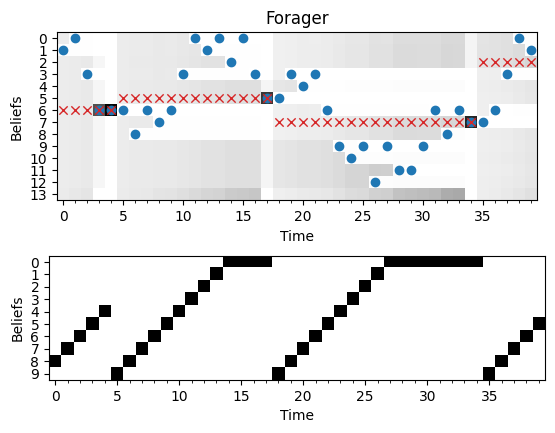

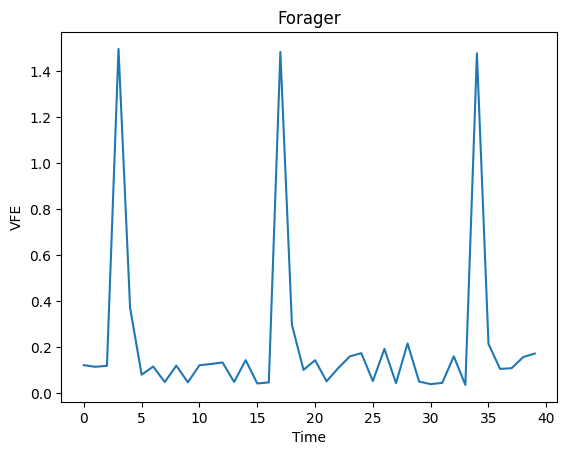

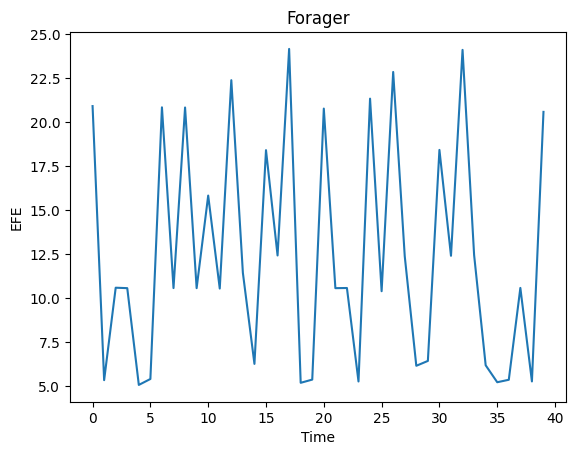

In [5]:
from visualize import *

plot_beliefs(result)
plot_vfe(result)
plot_efe(result)